<a href="https://colab.research.google.com/github/AyalSwaid/BookRecSys/blob/main/recSysNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download and unzip datasets

In [9]:
!kaggle datasets download -d arashnic/book-recommendation-dataset
!unzip -n "book-recommendation-dataset.zip"

Archive:  book-recommendation-dataset.zip
  inflating: Books.csv               
  inflating: Ratings.csv             
  inflating: Users.csv               
  inflating: recsys_taxonomy2.png    


# imports

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# EDA

In [16]:
# read datasets
ratings = pd.read_csv("Ratings.csv")
ratings = ratings.rename(columns = {'Book-Rating':'rating', 'User-ID': 'userID'})
users = pd.read_csv("Users.csv")
books = pd.read_csv("Books.csv")



<ipython-input-16-300aa37479f9>:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("Books.csv")


In [17]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   userID  1149780 non-null  int64 
 1   ISBN    1149780 non-null  object
 2   rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [14]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [15]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


## Check ratings distributions

[Text(0, 0, '716109'),
 Text(0, 0, '1770'),
 Text(0, 0, '2759'),
 Text(0, 0, '5996'),
 Text(0, 0, '8904'),
 Text(0, 0, '50974'),
 Text(0, 0, '36924'),
 Text(0, 0, '76457'),
 Text(0, 0, '103736'),
 Text(0, 0, '67541'),
 Text(0, 0, '78610')]

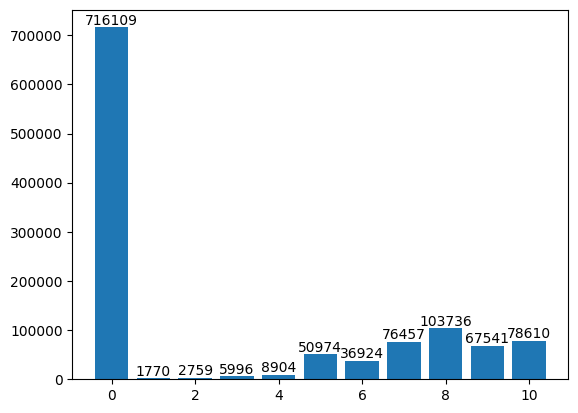

In [35]:
rating_dist = ratings.groupby(['rating']).count().reset_index()
rating_dist
# plt.bar(rating_dist["rating"].values,rating_dist["userID"])

fig, ax = plt.subplots()
bars = ax.bar(rating_dist["rating"].values, rating_dist["userID"])

ax.bar_label(bars)